In [2]:
import numpy as np
from PIL import Image, ImageDraw
import random
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

In [3]:
img_shape = (100, 100, 3)

In [95]:
def img_fixed_circles(img_shape, num_circles , max_radius = 32):
    w = img_shape[1]
    h = img_shape[0]
    img = Image.new('RGB', size=(w,h))
    draw = ImageDraw.Draw(img)
    #num_circles = random.randint(1,max_circ)
    list_of_coords = []
    circs_label = []
    for iC in range(num_circles):
        sz = random.randint(1,max_radius)
        x1 = random.randint(sz, w-sz)
        y1 = random.randint(sz, h-sz)
        x2 = x1+sz
        y2 = y1+sz
        coords = [x1,y1, x2,y2]
        coords_with_inverted_y = [y1,x1, y2,x2]
        list_of_coords.append(coords_with_inverted_y)
        circs_label.append('circle')
        draw.ellipse(coords, fill = 'white', outline='red')
    #img = np.array(img).astype(np.uint8)/255
    return img, [list_of_coords, circs_label]

[[[36, 20, 39, 23]], ['circle']]


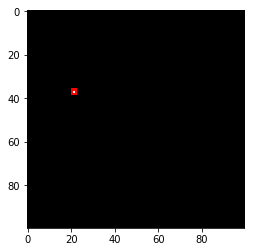

In [96]:
img , lblbbox = img_fixed_circles(img_shape,1)
print(lblbbox);plt.imshow(img)

In [97]:
p = Path('.')
data = p / 'data' / 'WillItLearn_Circles_ObjDetection'

In [98]:
data

PosixPath('data/WillItLearn_Circles_ObjDetection')

In [99]:
data.mkdir(parents=True,exist_ok=True)

In [100]:
total_figs = 1000

In [101]:
data

PosixPath('data/WillItLearn_Circles_ObjDetection')

In [105]:
dict_img_lblbbox = {}
img_name_lst = []
lblbbox_lst = []

for num_circs in range(1,10):
    print(num_circs)
    for figcnt in range(total_figs):
        img, lblbbox = img_fixed_circles(img_shape, num_circs)
        img_name_lst.append(str(data)+'/'+str(num_circs)+'_'+str(figcnt)+'.png')
        lblbbox_lst.append(lblbbox)
        figname = Path(str(num_circs)+'_'+str(figcnt)+'.png')
        img.save(data/figname)
        

1
2
3
4
5
6
7
8
9


In [106]:
dict_img_lblbbox = {'img_name' : img_name_lst, 'lblname': lblbbox_lst}
import pandas as pd
df = pd.DataFrame(data=dict_img_lblbbox)


In [107]:

df.to_csv(data/'WillItLearn_Circles_ObjDetect.csv')

In [64]:
data

PosixPath('data/WillItLearn_Circles_ObjDetection')